File exists! Proceeding with analysis...
Fundamental Frequency: 441.03053435114504 Hz


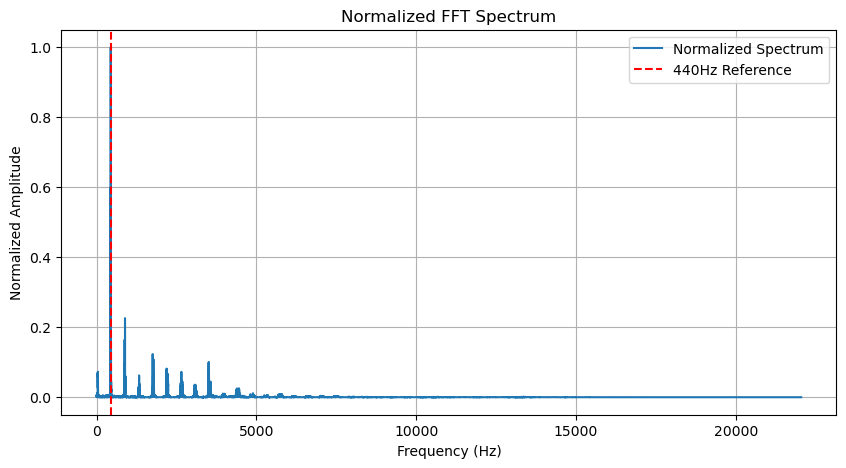

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import os

# Specify the path to your audio file
sound_data = "./sound_data/Violin A-violin.wav"  # Assuming the file is in the 'sound_data' folder in the current directory

# Check if the file exists
if not os.path.exists(sound_data):
    print(f"Error, {sound_data} doesn't exist")
else:
    print("File exists! Proceeding with analysis...")

    # Read the audio file
    sample_rate, data = wav.read(sound_data)

    # If stereo, take only one channel (usually the left one)
    if len(data.shape) > 1:
        data = data[:, 0]

    # Perform FFT
    fft_data = np.fft.fft(data)
    amplitude = np.abs(fft_data)  # Amplitude of FFT
    frequencies = np.fft.fftfreq(len(data), d=1/sample_rate)  # Frequency values corresponding to FFT bins

    # Keep only positive frequencies (real part)
    positive_freq = frequencies[:len(frequencies)//2]
    positive_ampl = amplitude[:len(amplitude)//2]

    # Find the fundamental frequency (the peak amplitude)
    fundamental_index = np.argmax(positive_ampl)
    fundamental_freq = positive_freq[fundamental_index]

    print(f"Fundamental Frequency: {fundamental_freq} Hz")

    # Normalize frequency (shifting everything so fundamental aligns with 440Hz)
    freq_shift = fundamental_freq - 440  # Shift so fundamental aligns with 440 Hz (A#)
    norm_freqs = positive_freq - freq_shift

    # Normalize amplitude (normalize by the amplitude at 440Hz)
    index_440Hz = np.argmin(np.abs(norm_freqs - 440))  # Find the index closest to 440Hz
    ampl_at_440Hz = positive_ampl[index_440Hz]
    norm_ampl = positive_ampl / ampl_at_440Hz  # Normalize amplitude

    # Plot the normalized spectrum
    plt.figure(figsize=(10, 5))
    plt.plot(norm_freqs, norm_ampl, label="Normalized Spectrum")
    plt.axvline(440, color='r', linestyle='--', label="440Hz Reference")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Normalized Amplitude")
    plt.title("Normalized FFT Spectrum")
    plt.legend()
    plt.grid(True)
    plt.show()
